In [2]:
import pandas as pd

df = pd.read_csv("sample_data.csv")

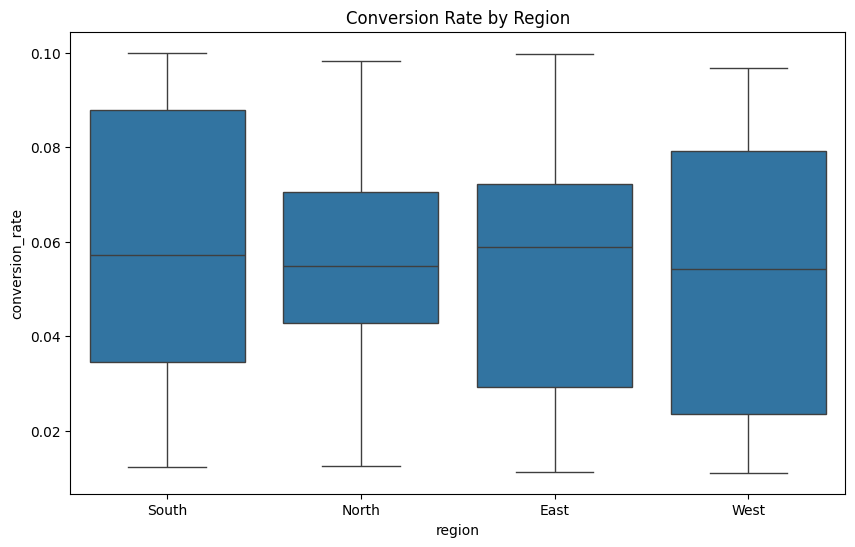

            mean       std
region                    
East    0.053966  0.027197
North   0.056476  0.023531
South   0.058087  0.027839
West    0.052027  0.027573


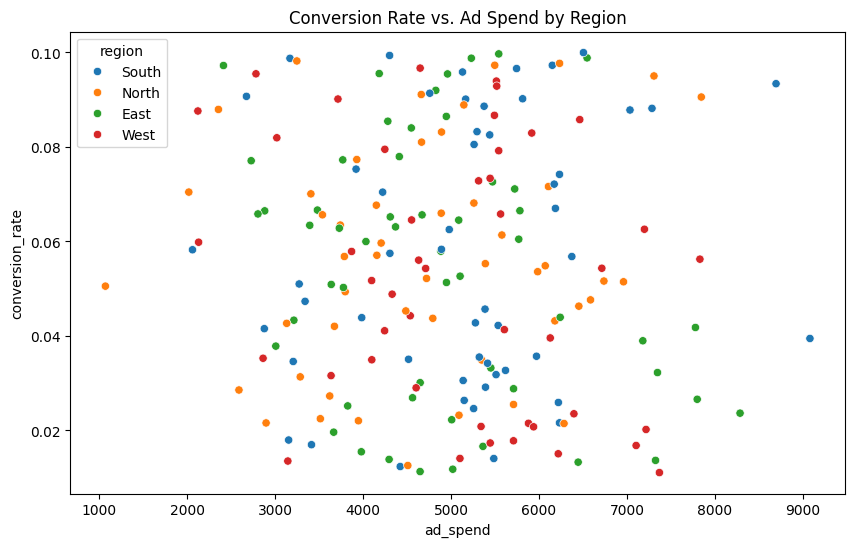

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="region", y="conversion_rate", data=df)
plt.title("Conversion Rate by Region")
plt.show()

print(df.groupby("region")["conversion_rate"].agg(["mean", "std"]))

plt.figure(figsize=(10, 6))
sns.scatterplot(x="ad_spend", y="conversion_rate", hue="region", data=df)
plt.title("Conversion Rate vs. Ad Spend by Region")
plt.show()

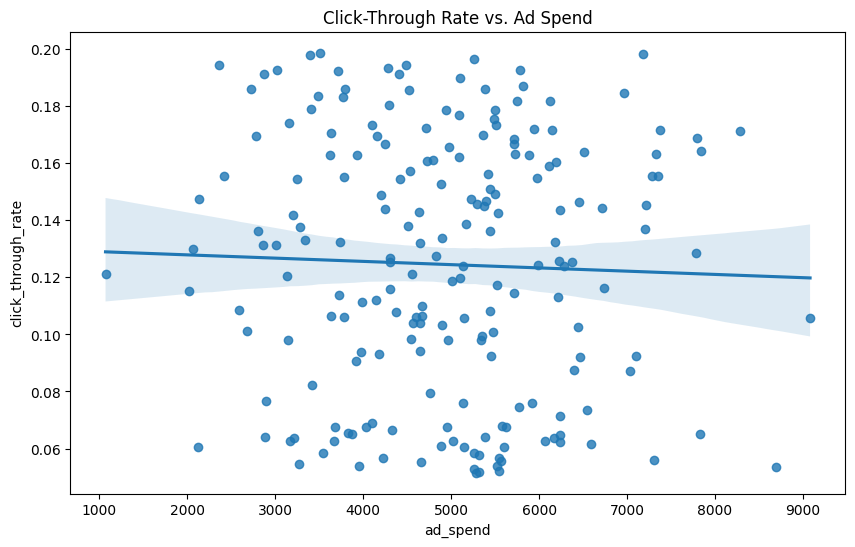

Pearson correlation: PearsonRResult(statistic=np.float64(-0.03578520970314752), pvalue=np.float64(0.6149162280595243))


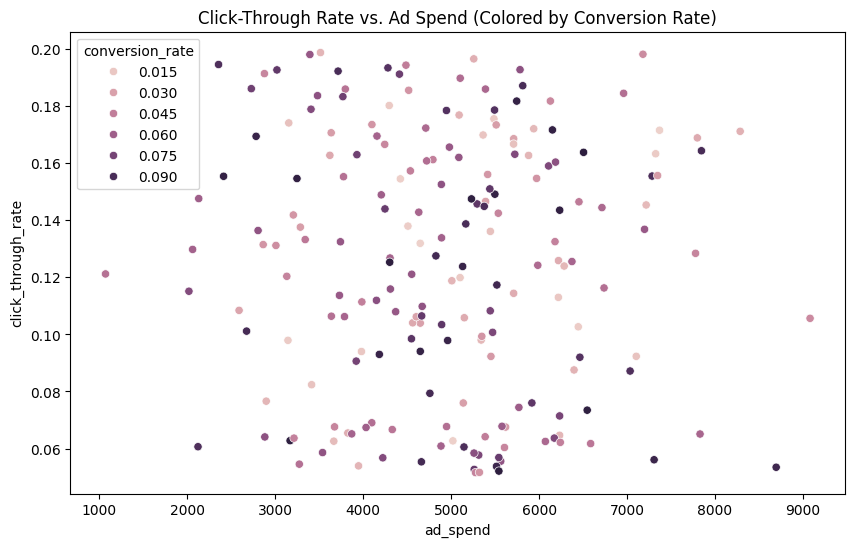

In [4]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
sns.regplot(x="ad_spend", y="click_through_rate", data=df)
plt.title("Click-Through Rate vs. Ad Spend")
plt.show()

# here ii calculate the pearson correlation between ad spend and CTR
correlation = stats.pearsonr(df["ad_spend"], df["click_through_rate"])
print(f"Pearson correlation: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="ad_spend", y="click_through_rate", hue="conversion_rate", data=df)
plt.title("Click-Through Rate vs. Ad Spend (Colored by Conversion Rate)")
plt.show()

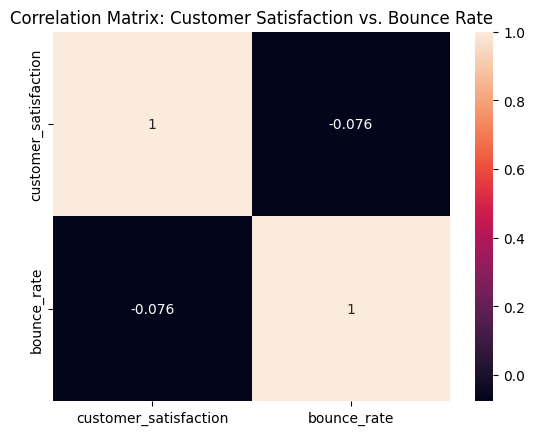

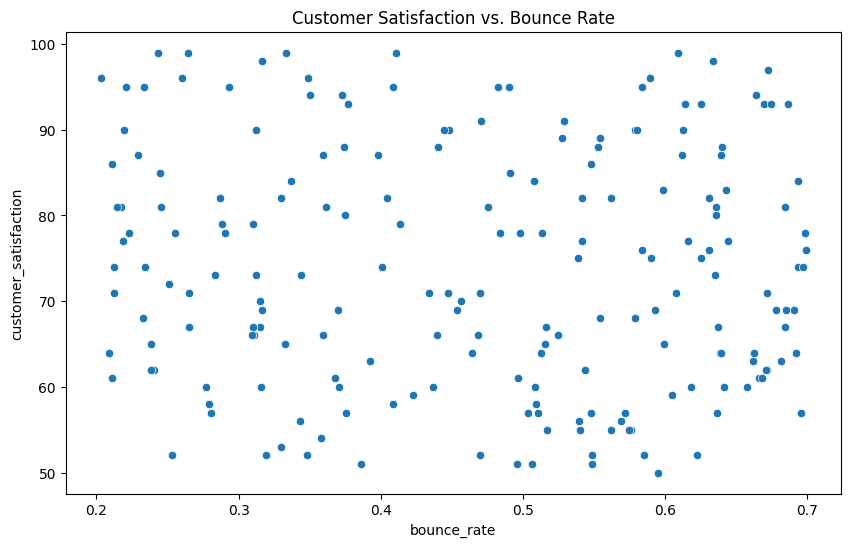

In [5]:
correlation_matrix = df[["customer_satisfaction", "bounce_rate"]].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix: Customer Satisfaction vs. Bounce Rate")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="bounce_rate", y="customer_satisfaction", data=df)
plt.title("Customer Satisfaction vs. Bounce Rate")
plt.show()


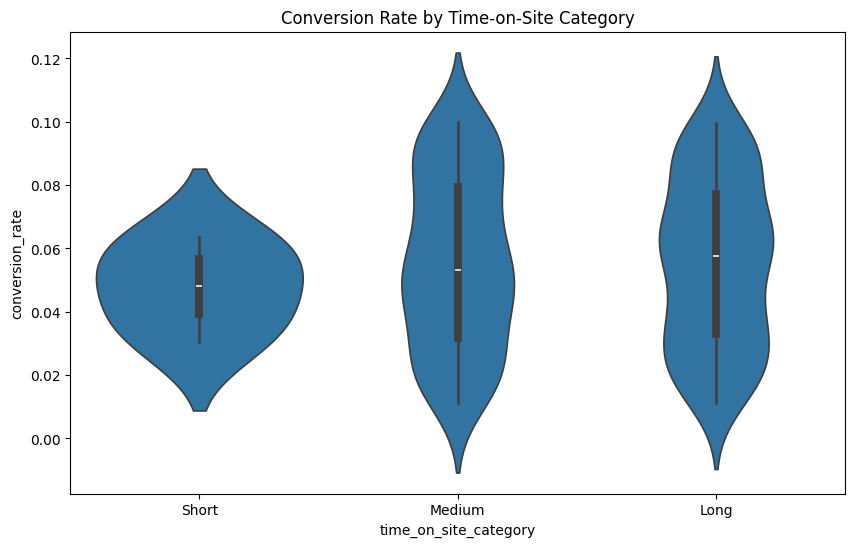

time_on_site_category
Short     0.047655
Medium    0.055662
Long      0.055090
Name: conversion_rate, dtype: float64
ANOVA F-statistic: 0.17596622732309755, p-value: 0.8387779766943408


In [9]:
bins = [0, 100, 200, 400]
labels = ["Short", "Medium", "Long"]
df["time_on_site_category"] = pd.cut(df["time_on_site"], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.violinplot(x="time_on_site_category", y="conversion_rate", data=df)
plt.title("Conversion Rate by Time-on-Site Category")
plt.show()

print(df.groupby("time_on_site_category", observed=True)["conversion_rate"].mean())

from scipy.stats import f_oneway
group1 = df[df["time_on_site_category"] == "Short"]["conversion_rate"]
group2 = df[df["time_on_site_category"] == "Medium"]["conversion_rate"]
group3 = df[df["time_on_site_category"] == "Long"]["conversion_rate"]
f_statistic, p_value = f_oneway(group1, group2, group3)
print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value}")

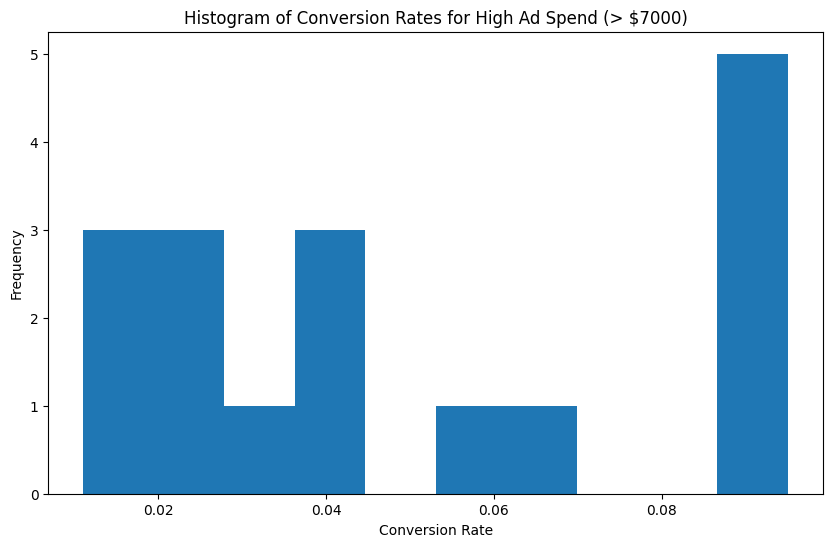

count    17.000000
mean      0.049321
std       0.030932
min       0.011094
25%       0.023671
50%       0.039475
75%       0.087825
max       0.095029
Name: conversion_rate, dtype: float64
count    183.000000
mean       0.055763
std        0.026087
min        0.011309
25%        0.033737
50%        0.056051
75%        0.077308
max        0.099975
Name: conversion_rate, dtype: float64


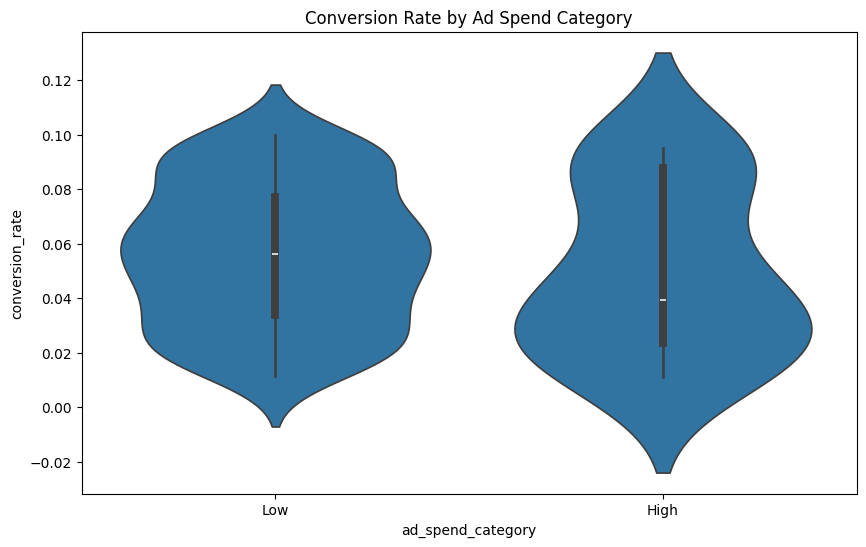

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (your existing code) ...

# Create the ad_spend_category column
df['ad_spend_category'] = np.where(df['ad_spend'] > 7000, 'High', 'Low')

# Create histogram of conversion rates for high ad spend
high_ad_spend_df = df[df["ad_spend"] > 7000]
plt.figure(figsize=(10, 6))
plt.hist(high_ad_spend_df["conversion_rate"])
plt.title("Histogram of Conversion Rates for High Ad Spend (> $7000)")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()

# Calculate conversion rate statistics for high spend
print(high_ad_spend_df["conversion_rate"].describe())

# Compare with low ad spend conversions
low_ad_spend_df = df[df["ad_spend"] <= 7000]
print(low_ad_spend_df["conversion_rate"].describe())

# Use violin plot for deeper visualization
plt.figure(figsize=(10, 6))
sns.violinplot(x="ad_spend_category", y="conversion_rate", data=df)  # Use the correct column name
plt.title("Conversion Rate by Ad Spend Category")
plt.show()

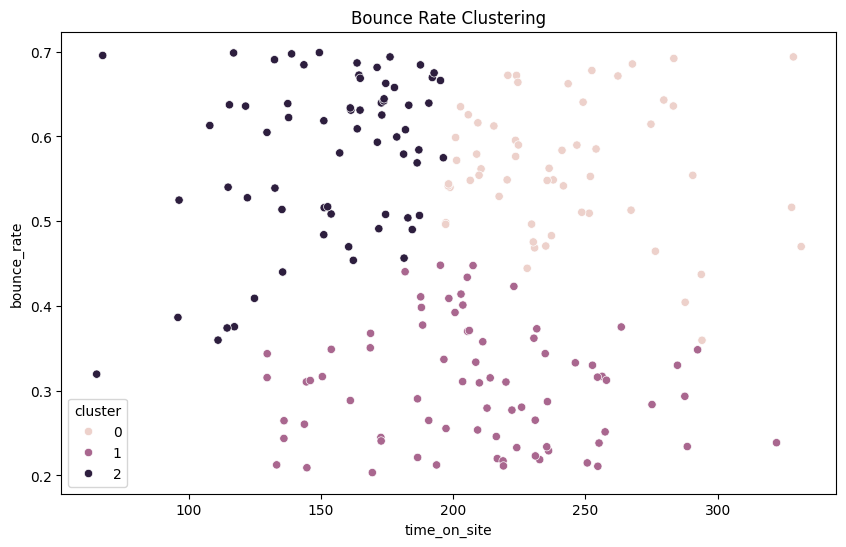

[[ 0.81507308  0.61497031]
 [ 0.18366407 -1.0712674 ]
 [-0.9182015   0.71870125]]


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = df[["time_on_site", "bounce_rate"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
df["cluster"] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="time_on_site", y="bounce_rate", hue="cluster", data=df)
plt.title("Bounce Rate Clustering")
plt.show()

# k means is pretty good algo tho.. but id prefer dbscan or k medoids sometimes
print(kmeans.cluster_centers_)

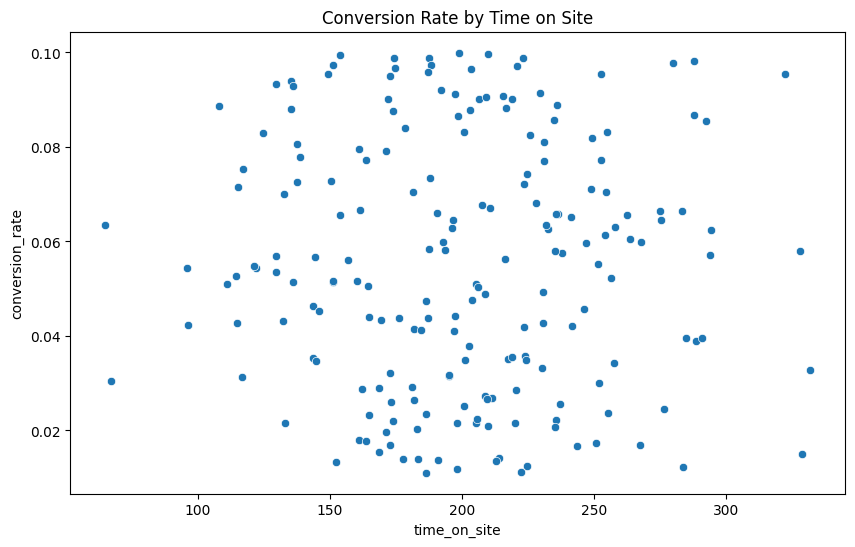

<Axes: xlabel='time_on_site', ylabel='conversion_rate'>

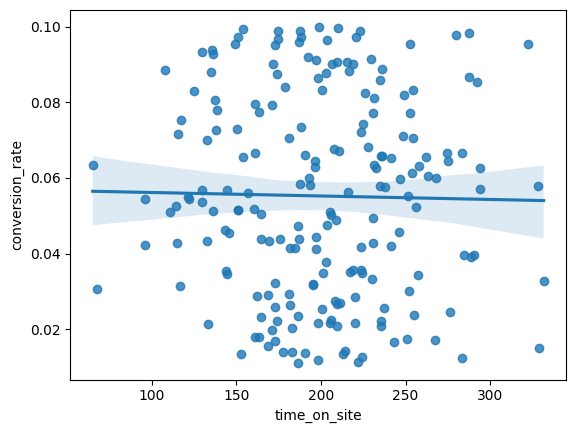

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="time_on_site", y="conversion_rate", data=df)
plt.title("Conversion Rate by Time on Site")
plt.show()

sns.regplot(x="time_on_site", y="conversion_rate", data=df)


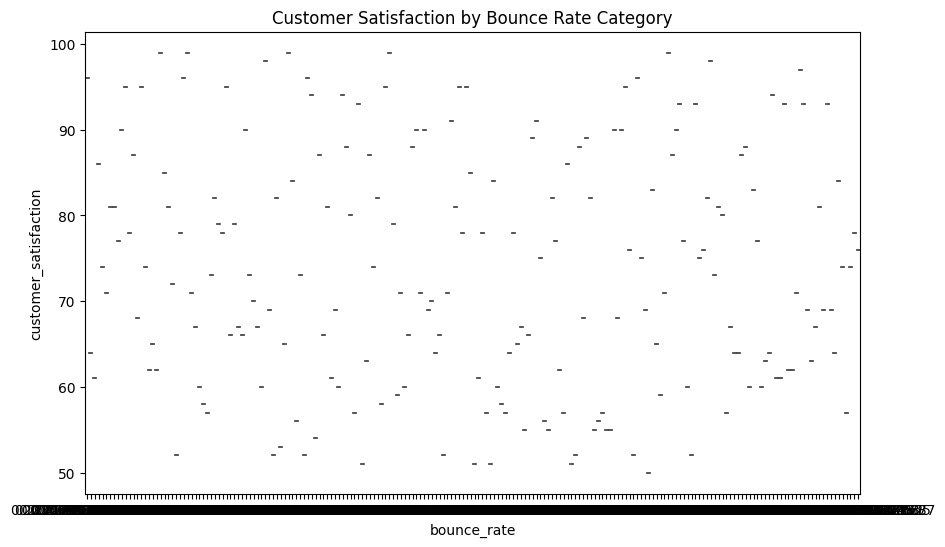

72.17525773195877
75.14563106796116


In [16]:
# Bounce Rate vs. Satisfaction


high_bounce_df = df[df["bounce_rate"] > 0.5]  # Example threshold
low_bounce_df = df[df["bounce_rate"] <= 0.5]

plt.figure(figsize=(10, 6))
sns.violinplot(x="bounce_rate", y="customer_satisfaction", data=df)
plt.title("Customer Satisfaction by Bounce Rate Category")
plt.show()

print(high_bounce_df["customer_satisfaction"].mean())
print(low_bounce_df["customer_satisfaction"].mean())

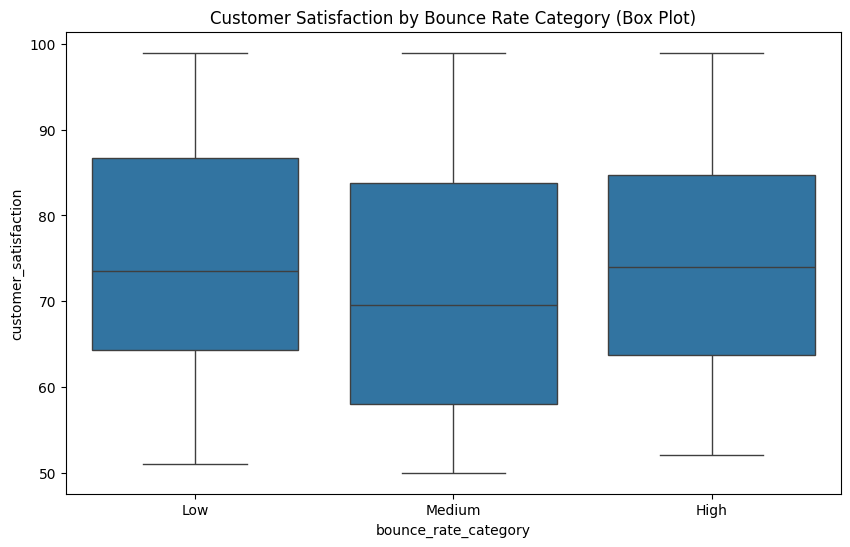

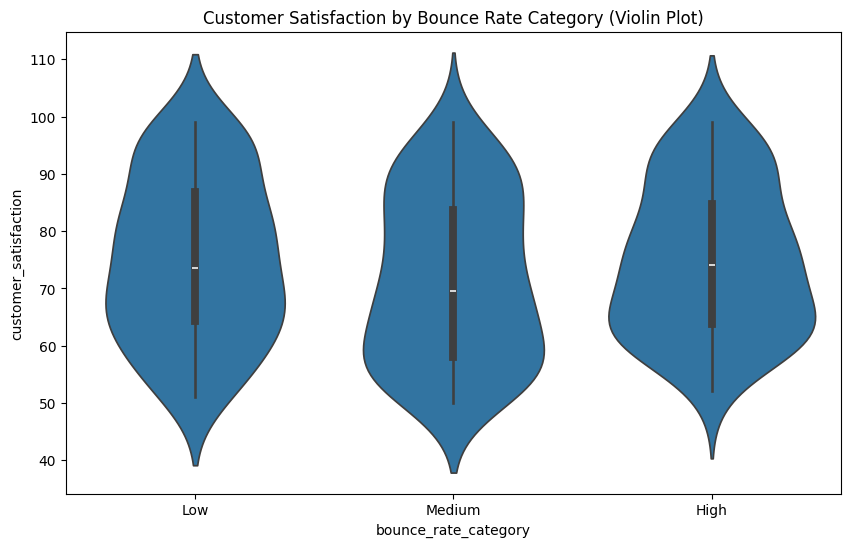

                           mean        std
bounce_rate_category                      
Low                   75.013514  14.045419
Medium                71.594595  14.381227
High                  74.846154  12.867933
ANOVA F-statistic: 1.3602860848786456, p-value: 0.2589866164992619
T-test (Low vs. High Bounce): t-statistic = 0.06813827604305996, p-value = 0.9457853124627089


In [19]:
from scipy.stats import f_oneway,ttest_ind

bins = [0, 0.4, 0.6, 1] 
labels = ["Low", "Medium", "High"]
df["bounce_rate_category"] = pd.cut(df["bounce_rate"], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x="bounce_rate_category", y="customer_satisfaction", data=df)
plt.title("Customer Satisfaction by Bounce Rate Category (Box Plot)")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="bounce_rate_category", y="customer_satisfaction", data=df)
plt.title("Customer Satisfaction by Bounce Rate Category (Violin Plot)")
plt.show()

print(df.groupby("bounce_rate_category", observed=True)["customer_satisfaction"].agg(["mean", "std"]))

group_low = df[df["bounce_rate_category"] == "Low"]["customer_satisfaction"]
group_medium = df[df["bounce_rate_category"] == "Medium"]["customer_satisfaction"]
group_high = df[df["bounce_rate_category"] == "High"]["customer_satisfaction"]
f_statistic, p_value = f_oneway(group_low, group_medium, group_high)
print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value}")

t_stat, p_value = ttest_ind(group_low, group_high)
print(f"T-test (Low vs. High Bounce): t-statistic = {t_stat}, p-value = {p_value}")

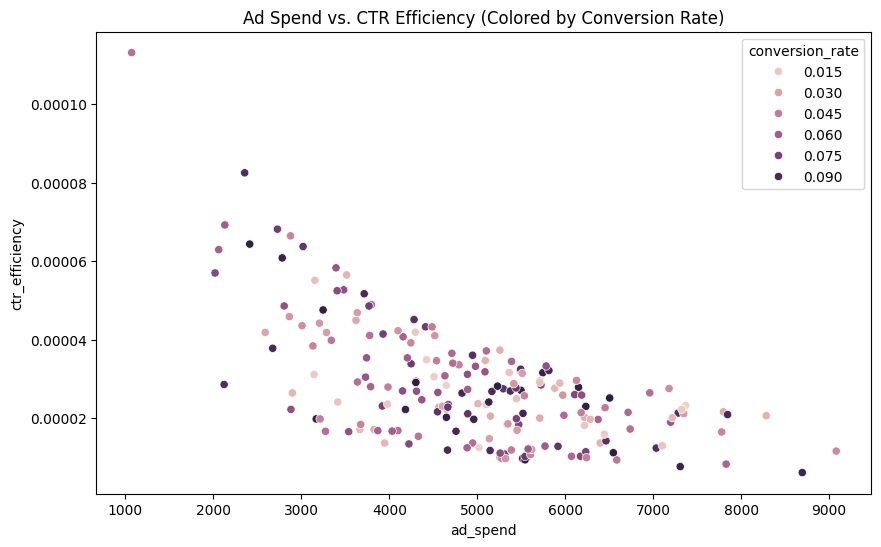

High Efficiency Ad Spends:
    event_id     ad_spend  click_through_rate  conversion_rate region  \
8          9  4295.788421            0.180061         0.013884   East   
13        14  2130.079633            0.147495         0.059847   West   
14        15  2412.623251            0.155295         0.097237   East   
15        16  4156.568706            0.169369         0.057079  North   
16        17  3480.753319            0.183501         0.066646   East   

    time_on_site  bounce_rate  customer_satisfaction time_on_site_category  \
8     177.785337     0.657744                     60                Medium   
13    267.781893     0.685529                     69                  Long   
14    220.671745     0.672133                     71                  Long   
15    293.839791     0.437107                     60                  Long   
16    161.310540     0.631021                     76                Medium   

   ad_spend_category  cluster bounce_rate_category  ctr_efficienc

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
df["ctr_efficiency"] = df["click_through_rate"] / df["ad_spend"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="ad_spend", y="ctr_efficiency", hue="conversion_rate", data=df)
plt.title("Ad Spend vs. CTR Efficiency (Colored by Conversion Rate)")
plt.show()

threshold = df["ctr_efficiency"].quantile(0.75)
high_efficiency_df = df[df["ctr_efficiency"] >= threshold]
print("High Efficiency Ad Spends:")
print(high_efficiency_df.head())

In [24]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# so im gonna do it using a dash
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="website performance dashboard or title like that.."),

    dcc.Dropdown(
        id='region-filter',
        options=[{'label': i, 'value': i} for i in df['region'].unique()],
        value=df['region'].unique()[0] 
    ),

    dcc.Graph(
        id='conversion-scatter',
        figure=px.scatter(df, x="ad_spend", y="conversion_rate", color="region")
    ),
])


if __name__ == '__main__':
    app.run_server(debug=True)